In [1]:
# import libraries
import numpy as np
import pandas as pd
from itertools import cycle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, ElasticNetCV, lasso_path, enet_path
np.set_printoptions(suppress=True)
rng = np.random.RandomState(seed=42)
pd.options.display.float_format = "{:.2f}".format

#import data 
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [3]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [4]:
df_boston.isna().sum() > 0

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
target     False
dtype: bool

Text(0, 0.5, 'LSTAT')

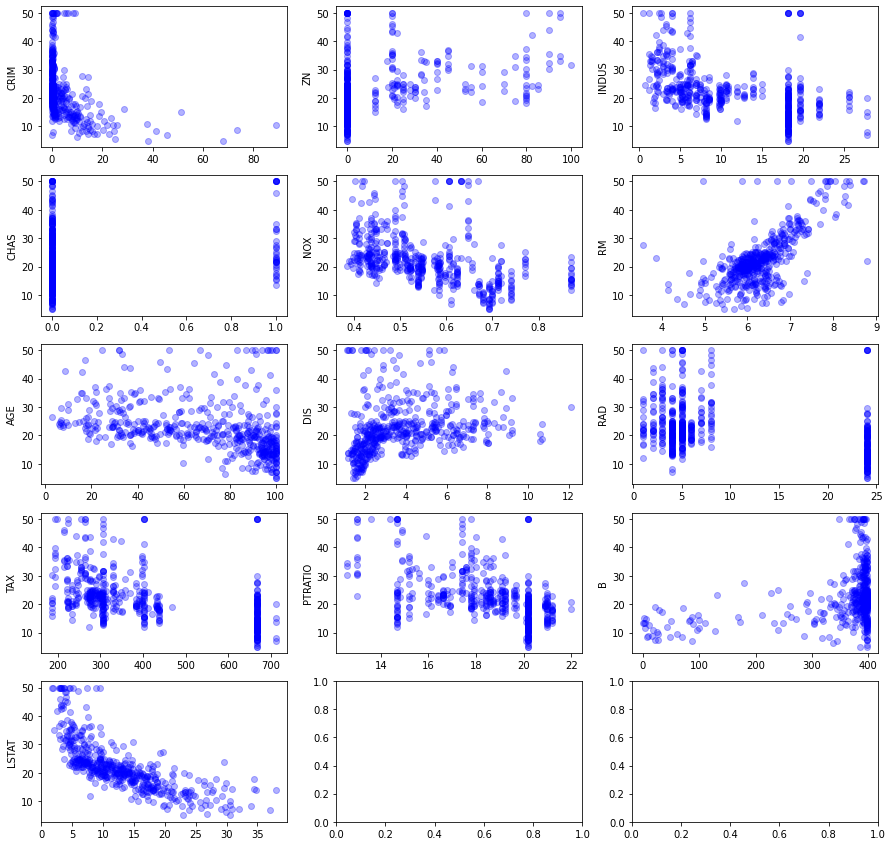

In [5]:
fig, ((ax1, ax2, ax3),( ax4, ax5, ax6),(ax7, ax8, ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(5, 3)
fig.set_size_inches(15,15)
ax1.plot(df_boston['CRIM'],df_boston['target'],"ob", alpha=0.3)
ax1.set_ylabel('CRIM')
ax2.plot(df_boston['ZN'],df_boston['target'],"ob", alpha=0.3) 
ax2.set_ylabel('ZN')
ax3.plot(df_boston['INDUS'],df_boston['target'],"ob", alpha=0.3)
ax3.set_ylabel('INDUS')
ax4.plot(df_boston['CHAS'],df_boston['target'],"ob", alpha=0.3) 
ax4.set_ylabel('CHAS')
ax5.plot(df_boston['NOX'],df_boston['target'],"ob", alpha=0.3) 
ax5.set_ylabel('NOX')
ax6.plot(df_boston['RM'],df_boston['target'],"ob", alpha=0.3) 
ax6.set_ylabel('RM')
ax7.plot(df_boston['AGE'],df_boston['target'],"ob", alpha=0.3) 
ax7.set_ylabel('AGE')
ax8.plot(df_boston['DIS'],df_boston['target'],"ob", alpha=0.3) 
ax8.set_ylabel('DIS')
ax9.plot(df_boston['RAD'],df_boston['target'],"ob", alpha=0.3) 
ax9.set_ylabel('RAD')
ax10.plot(df_boston['TAX'],df_boston['target'],"ob", alpha=0.3) 
ax10.set_ylabel('TAX')
ax11.plot(df_boston['PTRATIO'],df_boston['target'],"ob", alpha=0.3) 
ax11.set_ylabel('PTRATIO')
ax12.plot(df_boston['B'],df_boston['target'],"ob", alpha=0.3) 
ax12.set_ylabel('B')
ax13.plot(df_boston['LSTAT'],df_boston['target'],"ob", alpha=0.3) 
ax13.set_ylabel('LSTAT')

In [6]:
corr = df_boston.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Let's create a basic preprocessing pipeline, here we want to accomplish threemain objectives:

1. Transform categorical variables with one hot encoders and drop one of the categeries, this category will be used to interpret the results.
2. Normalize the values for the numerical variables

In [7]:
categorical_columns = ['CHAS']
numerical_columns = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

X = df_boston[categorical_columns + numerical_columns]
y=df_boston['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [8]:
categorical_pipe = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

numerical_pipe = Pipeline([
    ('std_scaler', StandardScaler())
])

preprocessing = ColumnTransformer([
    ('num', numerical_pipe, numerical_columns),
    ('cat', categorical_pipe, categorical_columns),
])

clf_lr = Pipeline([
    ('preprocess', preprocessing),
    ('L_regressor',LinearRegression()),
])

clf_ridge = Pipeline([
    ('preprocess', preprocessing),
    ('L_regressor',RidgeCV(alphas=np.logspace(-2, 10, 200), cv=10)),
]) 

clf_lasso = Pipeline([
    ('preprocess', preprocessing),
    ('L_regressor',LassoCV(eps = 5e-8, cv=10)),
]) 

clf_enet = Pipeline([
    ('preprocess', preprocessing),
    ('L_regressor',ElasticNetCV(eps = 5e-8, cv=10)),
]) 

In [9]:
clf_lr.fit(X_train,y_train)
y_pred_lr = clf_lr.predict(X_test)
print(clf_lr.named_steps['L_regressor'].coef_)
print("LR train score: %0.6f" % clf_lr.score(X_train, y_train))
print("LR test score: %0.6f" % clf_lr.score(X_test, y_test))

clf_ridge.fit(X_train,y_train)
y_pred_ridge = clf_ridge.predict(X_test)
print(clf_ridge.named_steps['L_regressor'].coef_)
print("Ridge train score: %0.6f" % clf_ridge.score(X_train, y_train))
print("Ridge test score: %0.6f" % clf_ridge.score(X_test, y_test))

clf_lasso.fit(X_train,y_train)
y_pred_lasso = clf_lasso.predict(X_test)
print(clf_lasso.named_steps['L_regressor'].coef_)
print("Lasso train score: %0.6f" % clf_lasso.score(X_train, y_train))
print("Lasso test score: %0.6f" % clf_lasso.score(X_test, y_test))

clf_enet.fit(X_train,y_train)
y_pred_enet = clf_lasso.predict(X_test)
print(clf_enet.named_steps['L_regressor'].coef_)
print("Enet train score: %0.6f" % clf_enet.score(X_train, y_train))
print("Enet test score: %0.6f" % clf_enet.score(X_test, y_test))


[-0.98858032  0.86793276  0.40502822 -1.90009974  2.80813518 -0.35866856
 -3.04553498  2.03276074 -1.36400909 -2.0825356   1.04125684 -3.92628626
  3.23866812]
LR train score: 0.739234
LR test score: 0.726157
[-0.8715974   0.65362238  0.15928058 -1.40412694  2.89990891 -0.35272457
 -2.52262399  1.30440983 -0.8040135  -1.94820489  1.03854791 -3.76809479
  2.11120909]
Ridge train score: 0.735727
Ridge test score: 0.723126
[-0.98857928  0.86793104  0.4050251  -1.90009715  2.8081354  -0.35866786
 -3.04553258  2.03275475 -1.36400333 -2.0825349   1.04125653 -3.92628653
  3.23866467]
Lasso train score: 0.739234
Lasso test score: 0.726157
[-0.94842005  0.79524644  0.2999359  -1.76004895  2.83294132 -0.34558115
 -2.91149908  1.7794992  -1.14020153 -2.04720797  1.03746722 -3.91044817
  2.9350093 ]
Enet train score: 0.738951
Enet test score: 0.725702


In [10]:
n_alphas = 200
alphas = np.logspace(-2, 10, n_alphas)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

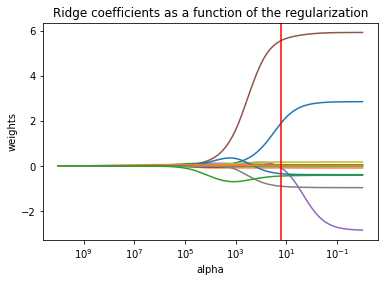

In [11]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.axvline(clf_ridge.named_steps['L_regressor'].alpha_, c='red')

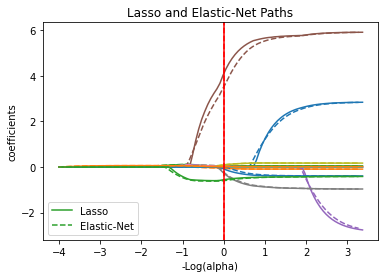

In [12]:
eps = 5e-8  # the smaller it is the longer is the path
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps, fit_intercept=False)
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True, fit_intercept=False)
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

plt.figure(1)
colors = cycle(['C0', 'C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8','C9','C10','C11','C12','C13'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')
plt.axvline(clf_lasso.named_steps['L_regressor'].alpha_, c='red')
plt.axvline(clf_enet.named_steps['L_regressor'].alpha_, c='red',  linestyle='--' )